#**LOGISTIC REGRESSION**

####**ABOUT DATASET**

The dataset to use for the creation of a Logistic Regression model is a dataset that helps predict whether a patient is having chronic kidney disease or not. The dataset is one of those belonging to the Kaggle Datasets, and can be found [here](https://www.kaggle.com/datasets/abhia1999/chronic-kidney-disease).

The objective of the dataset is to diagnostically predict whether a patient is having chronic kidney disease or not, based on certain diagnostic measurements included in the dataset. The datasets consists of 13 medical predictor variables and one target variable, Class. Predictor variables includes: Blood Pressure (**Bp**), Specific Gravity (**Sg**), Albumin (**Al**), Sugar (**Su**), Red Blood Cell (**Rbc**), Blood Urea (**Bu**), Serum Creatinine (**Sc**), Sodium (**Sod**), Pottasium (**Pot**), Hemoglobin (**Hemo**), White Blood Cell Count (**Wbcc**), Red Blood Cell Count (**Rbcc**) and Hypertension (**Htn**). All of them are numeric features.

**Output:**

* `Class`: The class is classified as **1** (has kidney disease) or **0** (does not have kidney disease).

This dataset was chosen because it was a binary classification problem, and the output data was relatively balanced.

####**LOGISTIC REGRESSION WITH SCKIT LEARN**

First, some necessary libraries are imported and the CSV file corresponding to the dataset to be used is loaded. The first row of the dataset contains the titles of each column.

In [ ]:
import sys
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#from numpy import nan
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

data = pd.read_csv("/content/new_model.csv", sep=",", header=0)
data

,Bp,Sg,Al,Su,Rbc,Bu,Sc,Sod,Pot,Hemo,Wbcc,Rbcc,Htn,Class
0,80.0,1.020,1.0,0.0,1.0,36.0,1.2,137.53,4.63,15.4,7800.0,5.20,1.0,1
1,50.0,1.020,4.0,0.0,1.0,18.0,0.8,137.53,4.63,11.3,6000.0,4.71,0.0,1
2,80.0,1.010,2.0,3.0,1.0,53.0,1.8,137.53,4.63,9.6,7500.0,4.71,0.0,1
3,70.0,1.005,4.0,0.0,1.0,56.0,3.8,111.00,2.50,11.2,6700.0,3.90,1.0,1
4,80.0,1.010,2.0,0.0,1.0,26.0,1.4,137.53,4.63,11.6,7300.0,4.60,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,80.0,1.020,0.0,0.0,1.0,49.0,0.5,150.00,4.90,15.7,6700.0,4.90,0.0,0
396,70.0,1.025,0.0,0.0,1.0,31.0,1.2,141.00,3.50,16.5,7800.0,6.20,0.0,0
397,80.0,1.020,0.0,0.0,1.0,26.0,0.6,137.00,4.40,15.8,6600.0,5.40,0.0,0
398,60.0,1.025,0.0,0.0,1.0,50.0,1.0,135.00,4.90,14.2,7200.0,5.90,0.0,0


Important characteristics about the dataset are extracted, to know the amount of missing data in each of the columns, the type of data they contain and some statistics.

In [ ]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Bp      400 non-null    float64
 1   Sg      400 non-null    float64
 2   Al      400 non-null    float64
 3   Su      400 non-null    float64
 4   Rbc     400 non-null    float64
 5   Bu      400 non-null    float64
 6   Sc      400 non-null    float64
 7   Sod     400 non-null    float64
 8   Pot     400 non-null    float64
 9   Hemo    400 non-null    float64
 10  Wbcc    400 non-null    float64
 11  Rbcc    400 non-null    float64
 12  Htn     400 non-null    float64
 13  Class   400 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 43.9 KB


,Bp,Sg,Al,Su,Rbc,Bu,Sc,Sod,Pot,Hemo,Wbcc,Rbcc,Htn,Class
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.00000,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,76.455000,1.017712,1.015000,0.395000,0.882500,57.40550,3.07235,137.529025,4.627850,12.526900,8406.090000,4.708275,0.369350,0.625000
std,13.476536,0.005434,1.272329,1.040038,0.322418,49.28597,5.61749,9.204273,2.819783,2.716171,2523.219976,0.840315,0.482023,0.484729
min,50.000000,1.005000,0.000000,0.000000,0.000000,1.50000,0.40000,4.500000,2.500000,3.100000,2200.000000,2.100000,0.000000,0.000000
25%,70.000000,1.015000,0.000000,0.000000,1.000000,27.00000,0.90000,135.000000,4.000000,10.875000,6975.000000,4.500000,0.000000,0.000000
50%,78.000000,1.020000,1.000000,0.000000,1.000000,44.00000,1.40000,137.530000,4.630000,12.530000,8406.000000,4.710000,0.000000,1.000000
75%,80.000000,1.020000,2.000000,0.000000,1.000000,61.75000,3.07000,141.000000,4.800000,14.625000,9400.000000,5.100000,1.000000,1.000000
max,180.000000,1.025000,5.000000,5.000000,1.000000,391.00000,76.00000,163.000000,47.000000,17.800000,26400.000000,8.000000,1.000000,1.000000


As part of the exploratory analysis, each of the input variables vs. the other variables is plotted, where the color of the points is given by the value of the output variable. This is done in order to establish whether the values are easily separable for each output value.

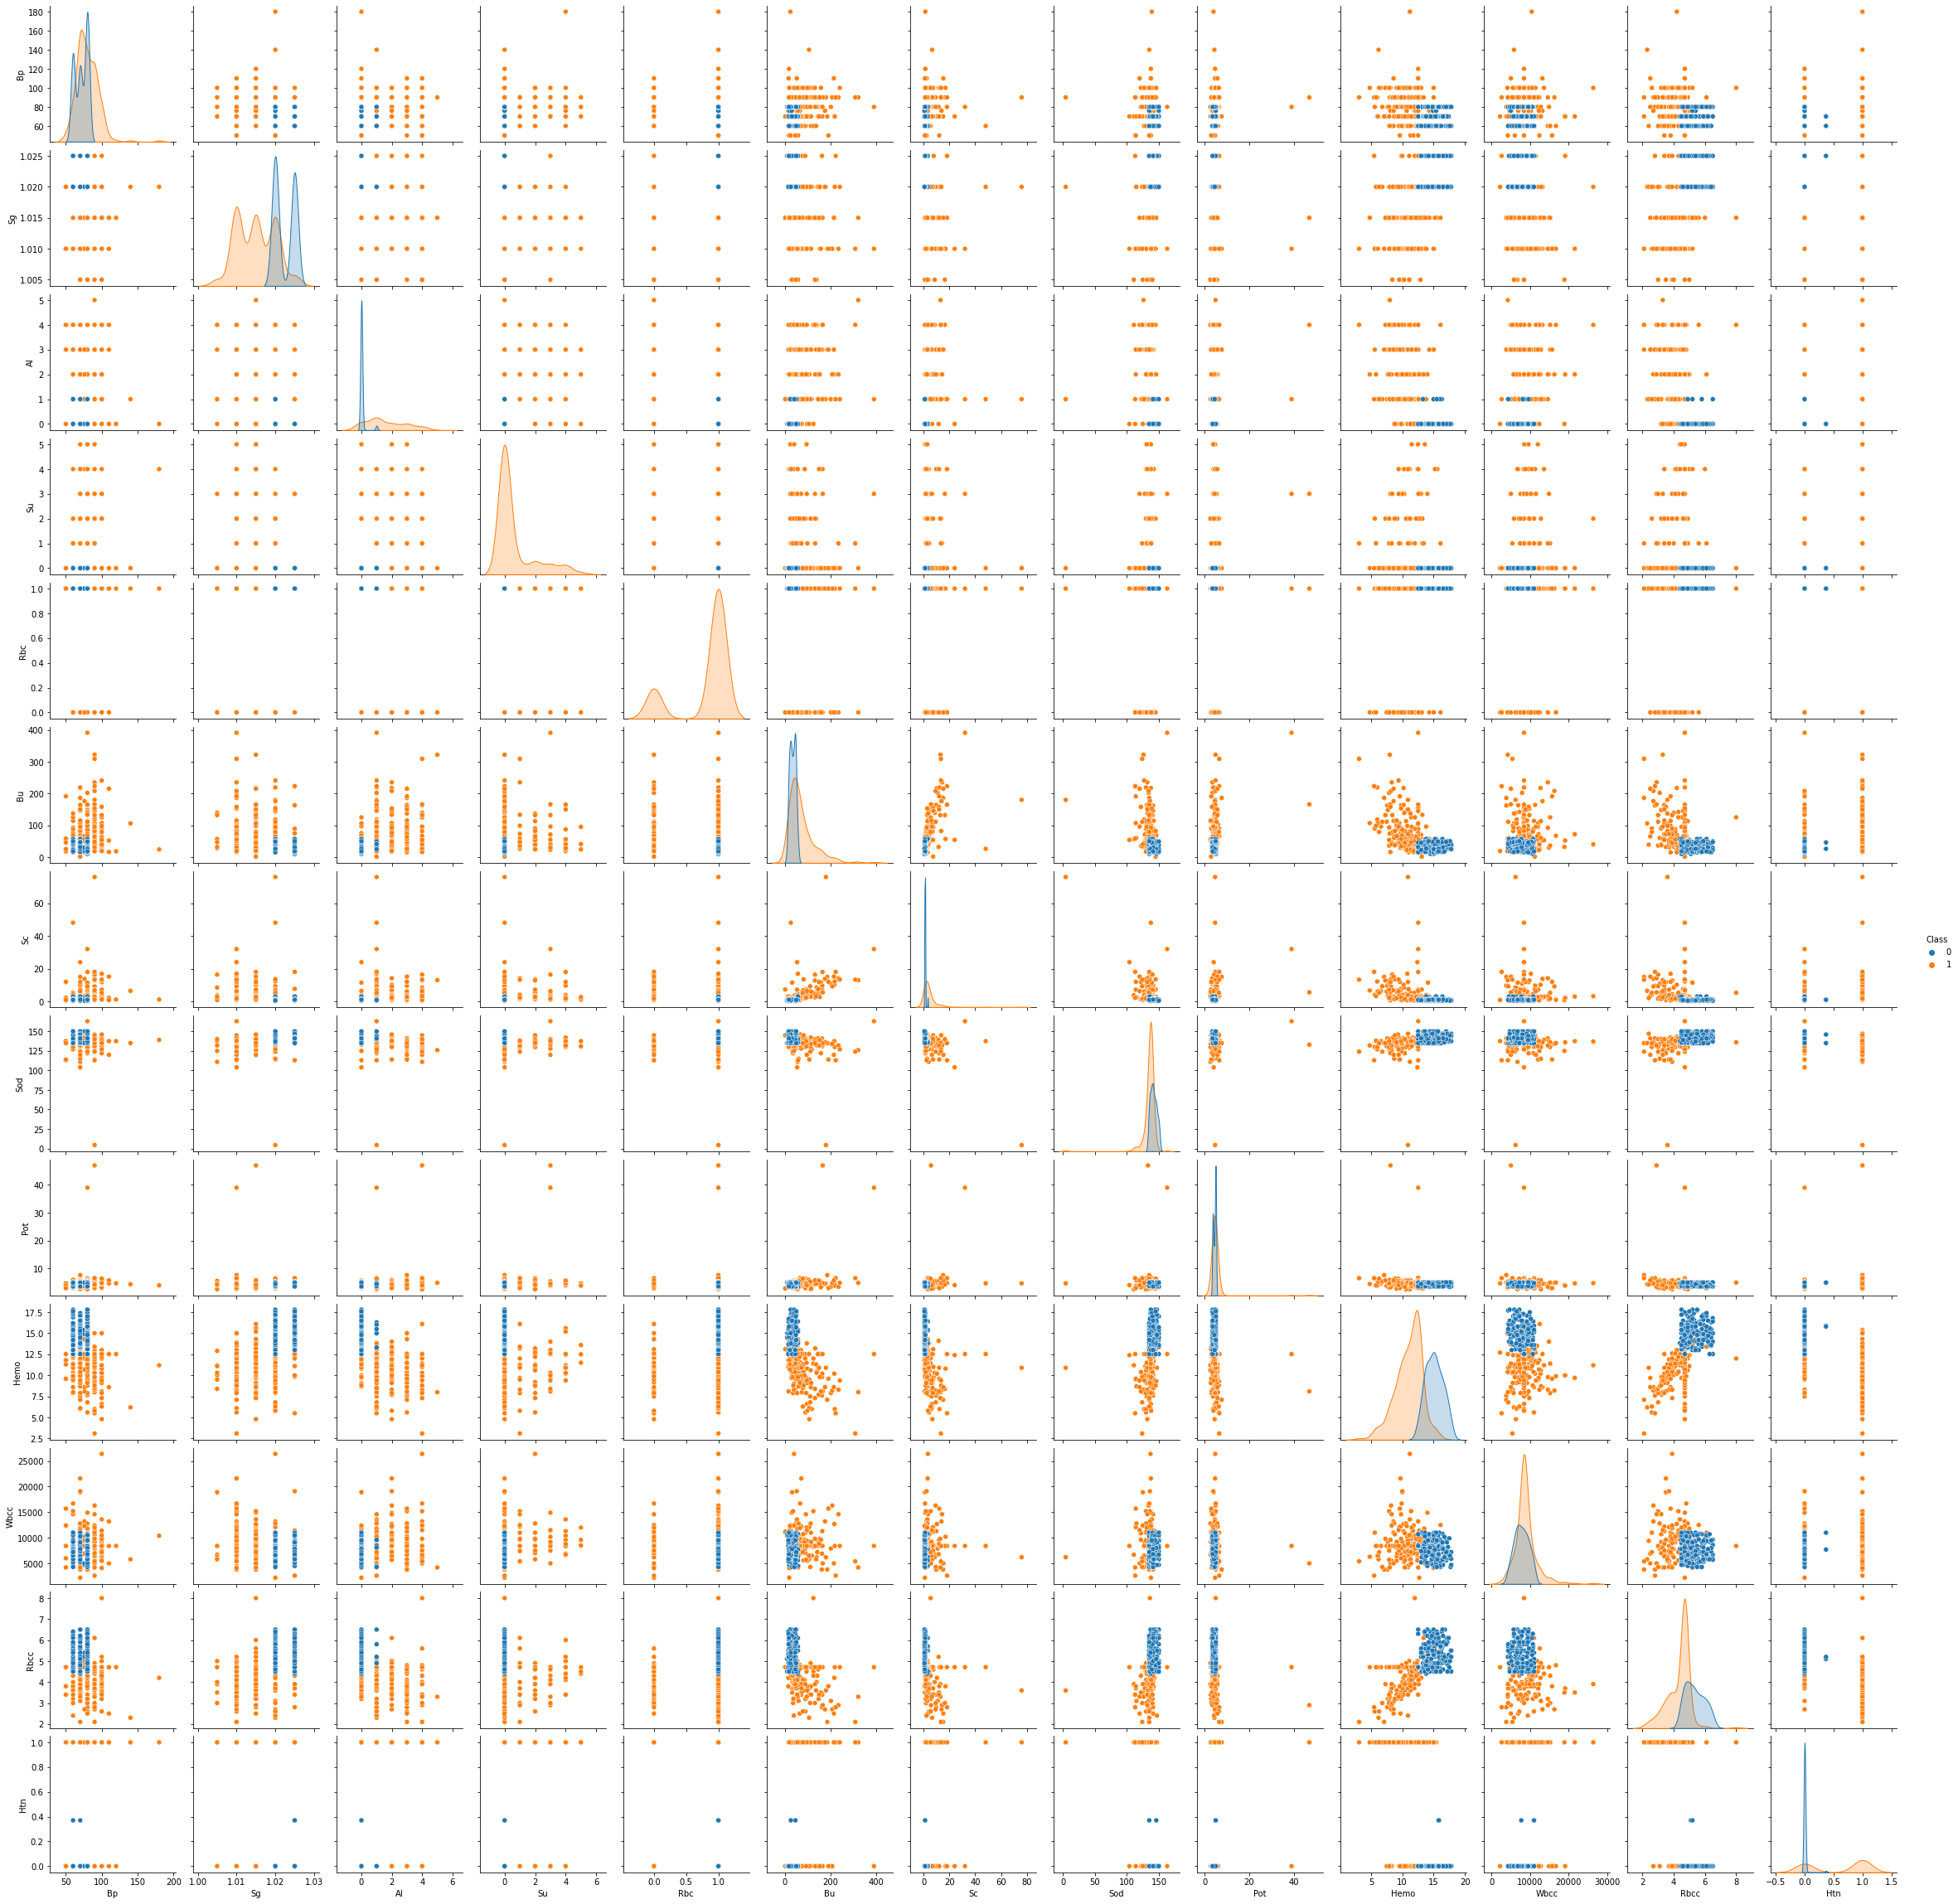

In [ ]:
sns.pairplot(data, hue="Class")

The dataset is divided into input and output data, taking the first 13 columns of the dataset (from 0 to 12) as input, and the last column as output. Also, the size of both the input and output data is printed.

In [ ]:
x = data.iloc[:, 0:13]
y = data.iloc[:, 13]

print(data.shape)
print(x.shape)
print(y.shape)

(400, 14)
(400, 13)
(400,)


Input data is normalized, using Scikit Learn's MinMaxScaler method.

In [ ]:
scaler = MinMaxScaler()
x = scaler.fit_transform(data.iloc[:,0:13])
x = pd.DataFrame(x)
print(x)

           0     1    2    3    4         5         6         7         8   \
0    0.230769  0.75  0.2  0.0  1.0  0.088575  0.010582  0.839306  0.047865   
1    0.000000  0.75  0.8  0.0  1.0  0.042362  0.005291  0.839306  0.047865   
2    0.230769  0.25  0.4  0.6  1.0  0.132221  0.018519  0.839306  0.047865   
3    0.153846  0.00  0.8  0.0  1.0  0.139923  0.044974  0.671924  0.000000   
4    0.230769  0.25  0.4  0.0  1.0  0.062901  0.013228  0.839306  0.047865   
..        ...   ...  ...  ...  ...       ...       ...       ...       ...   
395  0.230769  0.75  0.0  0.0  1.0  0.121951  0.001323  0.917981  0.053933   
396  0.153846  1.00  0.0  0.0  1.0  0.075738  0.010582  0.861199  0.022472   
397  0.230769  0.75  0.0  0.0  1.0  0.062901  0.002646  0.835962  0.042697   
398  0.076923  1.00  0.0  0.0  1.0  0.124519  0.007937  0.823344  0.053933   
399  0.230769  1.00  0.0  0.0  1.0  0.042362  0.009259  0.861199  0.022472   

           9         10        11   12  
0    0.836735  0.23140

The data is partitioned into training and validation data. In this case, 70% of the data corresponds to training and the remaining 30% to validation.

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

A logistic regression model is created using Scikit Learn's LogisticRegression method, which is a type of statistical model often used for classification and predictive analytics. Logistic regression estimates the probability of an event occurring, based on a given dataset of independent variables. Since the outcome is a probability, the dependent variable is bounded between 0 and 1. 

After that, the logistic regression model is trained, taking into account the training data, and the prediction is made with the validation data. Finally, the accuracy obtained is calculated and printed. This would be the first evaluation metric to take into account.

**Accuracy:** Is the fraction of predictions the model got right.

\begin{equation}
Accuracy = \frac{TP + TN}{TP + TN + FP + FN}
\end{equation}

- *TP* = True positive (the model predicted that it is positive, and it is true).
* *TN* = True negative (the model predicted that it is negative, and it is true).
* *FP* = False positive (the model predicted that it is positive, and it is false).
* *FN* = False negative (the model predicted that it is negative, and it is false).

Accuracy is the number of correct predictions, divided into the total number of predictions.

In [ ]:
model = LogisticRegression(solver='newton-cg', max_iter=13)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
accuracy_model = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy_model)

Accuracy:  0.9833333333333333


Another evaluation metric is the confusion matrix. It is a performance measurement for machine learning classification problem where output can be two or more classes (in this case, two classes). It is a table with 4 different combinations of predicted and actual values. That said, the confusion matrix is calculated and displayed. Also, the model score is printed. This is the mean accuracy of the given training and test data and labels.

Scores for Logistic Regression
Training set score: 0.979
Test set score: 0.983


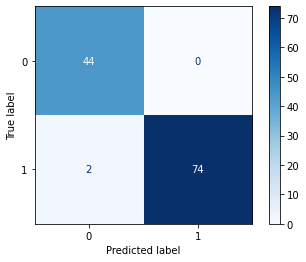

In [ ]:
print('Scores for Logistic Regression')
print("Training set score: {:.3f}".format(model.score(x_train, y_train)))
print("Test set score: {:.3f}".format(model.score(x_test, y_test)))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='Blues')
plt.show()

The confusion matrix is useful for measuring Precision, Recall (Sensitivity), Specificity, Accuracy and AUC-ROC curves.

* **Precision:** From all the classes the model has predicted as positive, how many are actually positive. It is intuitively the ability of the classifier not to label a negative sample as positive.

\begin{equation}
Precision = \frac{TP}{TP + FP}
\end{equation}

* **Recall (Sensitivity):** From all the positive classes, how many the model predicted correctly. It is intuitively the ability of the classifier to find all the positive samples.

\begin{equation}
Recall = \frac{TP}{TP + FN}
\end{equation}

* **F1-score:** It can be interpreted as a harmonic mean of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0. The relative contribution of precision and recall to the F1 score are equal. 

\begin{equation}
F1score = \frac{2*Recall*Precision}{Recall + Precision}
\end{equation}

* **Support:** It is the number of occurrences of each class in *y_true*.

* **Specificity:**

\begin{equation}
Specificity = \frac{TN}{TN + FP}
\end{equation}

In [ ]:
conf_mat = metrics.confusion_matrix(y_test, y_pred)
print(metrics.classification_report(y_test, y_pred))

TN = conf_mat[0,0]
TP = conf_mat[1,1]
FN = conf_mat[1,0] 
FP = conf_mat[0,1]
print('TN: ', TN,'  TP: ', TP,'  FN: ', FN,'  FP: ', FP)

sensitivity= TP/(TP+FN)
specificity= TN/(TN+FP)
print('sensitivity:', sensitivity)
print('specificity:', specificity)

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        44
           1       1.00      0.97      0.99        76

    accuracy                           0.98       120
   macro avg       0.98      0.99      0.98       120
weighted avg       0.98      0.98      0.98       120

TN:  44   TP:  74   FN:  2   FP:  0
sensitivity: 0.9736842105263158
specificity: 1.0


Another evaluation metric is the ROC Curve and AUC:

* **ROC (Receiver operating characteristic) Curve:** Is a graph showing the performance of a classification model at all classification thresholds. This curve plots two parameters: TPR (true positive rate) and FPR (false positive rate). A ROC curve plots TPR vs. FPR at different classification thresholds. Lowering the classification threshold classifies more items as positive, thus increasing both False Positives and True Positives.

\begin{equation}
TPR = \frac{TP}{TP + FN}
\end{equation}

\begin{equation}
FPR = \frac{FP}{FP + TN}
\end{equation}

* **AUC (Area Under the ROC Curve):** That is, AUC measures the entire two-dimensional area underneath the entire ROC curve, from (0,0) to (1,1). AUC provides an aggregate measure of performance across all possible classification thresholds. One way of interpreting AUC is as the probability that the model ranks a random positive example more highly than a random negative example. AUC ranges in value from 0 to 1. A model whose predictions are 100% wrong has an AUC of 0.0; one whose predictions are 100% correct has an AUC of 1.0.

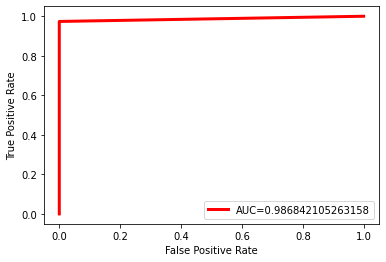

roc_auc_score for Logistic Regression:  0.986842105263158


In [ ]:
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred)
auc = roc_auc_score(y_test, y_pred)

plt.plot(fpr, tpr, color='red', linewidth=3, label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.rcParams['figure.figsize'] = [8, 4]
plt.legend()
plt.show()

print('roc_auc_score for Logistic Regression: ', auc)

Both the actual output and the predicted output data are plotted, in order to observe the quality of the model obtained.

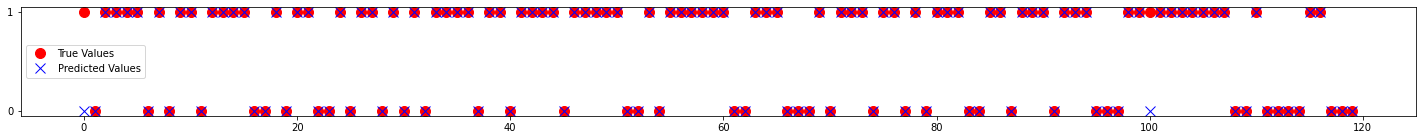

In [ ]:
plt.rcParams['figure.figsize'] = [25, 2]
plt.plot(range(len(y_test)), y_test, 'ro', markersize=10, label='True Values')
plt.plot(range(len(y_pred)), y_pred, 'bx', markersize=10, label='Predicted Values')
plt.yticks([0,1])
plt.legend(loc='center left')

According to the previous graph, only two data were incorrectly classified, since they were classified as 0 when in fact they should have taken the value of 1 (two false negatives). This could also be verified with the confusion matrix.

####**CUSTOM LOGISTIC REGRESSION**

This part follows the procedure performed on the page [Implementing logistic regression from scratch in Python](https://developer.ibm.com/articles/implementing-logistic-regression-from-scratch-in-python/), modifying the necessary parameters to adjust to the dataset that is being used.

First, the Github repository containing the package created by Casper Hansen is imported. This is done in order not to have to write all the code for the package in this section. However, in the other section it is shown in its entirety.

In [ ]:
!git clone https://github.com/casperbh96/Logistic-Regression-From-Scratch.git -q    # Github Repository
sys.path.insert(0,'/content/Logistic-Regression-From-Scratch/src')

The module created by Casper Hansen is used to create the Logistic Regression model and it is trained taking into account the training data.

In [ ]:
from logistic_regression import LogisticRegression as CustomLogisticRegression

lr = CustomLogisticRegression()
lr.fit(x_train, y_train, epochs = 13)

The prediction is made with the validation data, and the accuracy obtained is calculated and printed.

In [ ]:
pred = lr.predict(x_test)
accuracy_lr = accuracy_score(y_test, pred)
print("Accuracy:", accuracy_lr)

Accuracy: 0.9666666666666667


The confusion matrix is calculated and displayed.

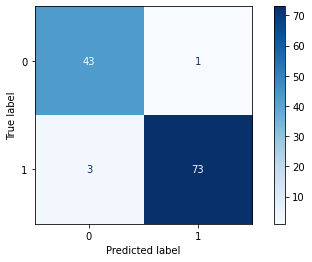

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, pred, cmap='Blues')
plt.show()

The values for Precision, Recall, F1-score and Specificity are calculated and printed.

In [ ]:
conf_mat_lr = metrics.confusion_matrix(y_test, pred)
print(metrics.classification_report(y_test, pred))

TN = conf_mat_lr[0,0] 
TP = conf_mat_lr[1,1] 
FN = conf_mat_lr[1,0] 
FP = conf_mat_lr[0,1]
print('TN: ', TN,'  TP: ', TP,'  FN: ', FN,'  FP: ', FP)

sensitivity = TP/(TP+FN)
specificity = TN/(TN+FP)
print('sensitivity: ', sensitivity)
print('specificity: ', specificity)

              precision    recall  f1-score   support

           0       0.93      0.98      0.96        44
           1       0.99      0.96      0.97        76

    accuracy                           0.97       120
   macro avg       0.96      0.97      0.96       120
weighted avg       0.97      0.97      0.97       120

TN:  43   TP:  73   FN:  3   FP:  1
sensitivity:  0.9605263157894737
specificity:  0.9772727272727273


The ROC curve is calculated and plotted along with the AUC value.

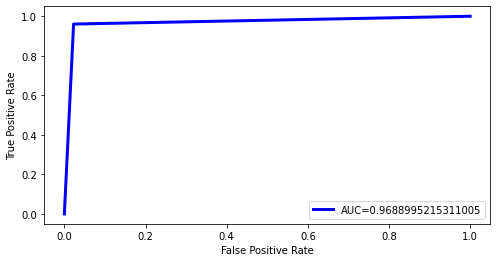

roc_auc_score for Logistic Regression:  0.9688995215311005


In [ ]:
fpr1, tpr1, _ = metrics.roc_curve(y_test, pred)
auc1 = roc_auc_score(y_test, pred)

plt.plot(fpr1, tpr1, color='blue', linewidth=3, label="AUC="+str(auc1))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.rcParams['figure.figsize'] = [8, 4]
plt.legend()
plt.show()

print('roc_auc_score for Logistic Regression: ', auc1)

Both the actual output and the predicted output data are plotted, in order to observe the quality of the model obtained.

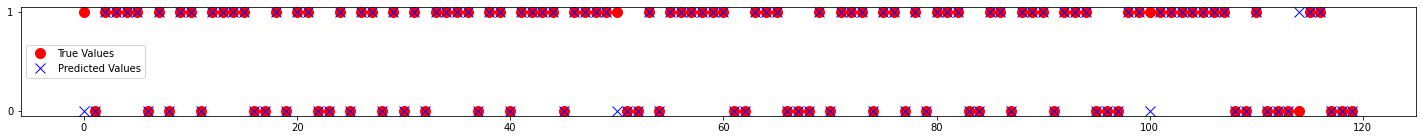

In [ ]:
plt.rcParams['figure.figsize'] = [25, 2]
plt.plot(range(len(y_test)), y_test, 'ro', markersize=10, label='True Values')
plt.plot(range(len(pred)), pred, 'bx', markersize=10, label='Predicted Values')
plt.yticks([0,1])
plt.legend(loc='center left')

According to the previous graph, only four data were incorrectly classified, since three of them were classified as 0 when in fact they should have taken the value of 1 (three false negatives), and the other was classified as 1 when in fact it should have taken the value of 0 (one false positive). This could also be verified with the confusion matrix.

####**CUSTOM LOGISTIC REGRESSION CHANGING THE OPTIMIZER**

This part follows the procedure performed on the page [Implementing logistic regression from scratch in Python](https://developer.ibm.com/articles/implementing-logistic-regression-from-scratch-in-python/), modifying the optimizer to use.

The optimizer to use in this section is the [ADAM optimizer](https://keras.io/api/optimizers/adam/). Adam optimization is a stochastic gradient descent method that is based on adaptive estimation of first-order (estimate of the mean) and second-order moments (estimate of the variance). Using these moment estimates we can update the parameters, given an appropriate learning rate. The update rule of Adam is a combination of momentum and the RMSProp optimizer.

Two values that Adam depend on are β₁ and β₂:
* **β₁:** is a float value or a constant float tensor, and it represents the exponential decay rate for the 1st moment estimates. Its default value is 0.9.
* **β₂:** is a float value or a constant float tensor, and it represents the exponential decay rate for the 2nd moment estimates. Its default value is 0.999.

The above is defined by the equations:

\begin{equation}
m_{t}=\beta_{1}m_{t-1}+(1-\beta_{1})g_{t}
\end{equation}
\begin{equation}
v_{t}=\beta_{2}v_{t-1}+(1-\beta_{2})g_{t}^{2}
\end{equation}

On a given iteration *t*, we can calculate the moving averages based on parameters β₁, β₂, and gradient *gt*. Then, we need an extra step to correct the parameters:

\begin{equation}
\hat{m}_{t}=\frac{m_{t}}{1-\beta_{1}^{t}}
\end{equation}
\begin{equation}
\hat{v}_{t}=\frac{v_{t}}{1-\beta_{2}^{t}}
\end{equation}

Finally, we can update the parameters (weights) based on the calculated moving averages with a step size η (learning rate):

\begin{equation}
w_{t}=w_{t-1}-\eta\frac{\hat{m}_{t}}{\sqrt{\hat{v}_{t}}+\epsilon}
\end{equation}

ϵ is a small constant for numerical stability (to prevent zero-division). Its default value is 1e-8.

Taking into account the above, the first step is to define the optimizer class, where all the equations shown above are implemented.

In [ ]:
import numpy as np
class AdamOptim():
    def __init__(self, learning_rate=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-8):
        self.m_dw, self.v_dw = 0, 0
        self.m_db, self.v_db = 0, 0
        self.beta_1 = beta_1
        self.beta_2 = beta_2
        self.epsilon = epsilon
        self.learning_rate = learning_rate
    def update(self, t, w, b, dw, db):
        ## Momentum beta 1
        # *** Weights *** #
        self.m_dw = self.beta_1*self.m_dw + (1-self.beta_1)*dw
        # *** Biases *** #
        self.m_db = self.beta_1*self.m_db + (1-self.beta_1)*db

        ## RMS beta 2
        # *** Weights *** #
        self.v_dw = self.beta_2*self.v_dw + (1-self.beta_2)*(dw**2)
        # *** Biases *** #
        self.v_db = self.beta_2*self.v_db + (1-self.beta_2)*(db**2)

        # Weights and bias correction.
        m_dw_corr = self.m_dw/(1-self.beta_1**t)
        m_db_corr = self.m_db/(1-self.beta_1**t)
        v_dw_corr = self.v_dw/(1-self.beta_2**t)
        v_db_corr = self.v_db/(1-self.beta_2**t)

        # Weights and bias update.
        w = w - self.learning_rate*(m_dw_corr/(np.sqrt(v_dw_corr) + self.epsilon))
        b = b - self.learning_rate*(m_db_corr/(np.sqrt(v_db_corr) + self.epsilon))
        
        return w, b

In the Logistic Regression model class, several functions are defined where a series of equations are implemented, that allow obtaining the updated values of the parameters (weights, bias).

In the function called *compute_loss*, the loss function is defined. The loss function is used to measure how much the prediction differs from the labels, which can only be 0 or 1 in a binary classification algorithm. In this case, Binary cross entropy is the function that is used, which yields the error value. In this function, all of the errors are found by comparing the ground truth *y_true* with the predictions *y_pred*.

\begin{equation}
L_{CE}(\hat{y}, y)=\frac{-1}{m}\sum_{i=1}^m y \log(\hat{y})+(1-y)\log(1-\hat{y})
\end{equation}

In the function called *compute_gradients*, the gradients (partial derivatives of binary cross entropy with respect to weights and biases) are calculated, which are what the model uses to update the model parameters. It starts by finding the difference (predicted output minus real output) and use it to calculate the gradients for the bias by finding the average error. Afterward, it has to multiply the difference by the inputs (*x*). Then, it finds the average of each gradient. Now, it can return the changes and update your model. The above follows the next equations:

\begin{equation}
\frac{\partial L_{CE}(\hat{y},y)}{\partial w}=\frac{1}{m}(\hat{y}-y)x_{i}^{T}
\end{equation}

\begin{equation}
\frac{\partial L_{CE}(\hat{y},y)}{\partial b}=\frac{1}{m}(\hat{y}-y)
\end{equation}

With the errors (gradients) already calculated, the weights must be updated for the next iteration; so that the model can learn from the next errors. This is done in the function called *update_model_parameters*, following the next equation: 

\begin{equation}
\theta_{t+1}=\theta_{t}-\eta\bigtriangledown L(f(x; \theta), y)
\end{equation}

In the function called *predict*, the prediction is calculated by multiplying the inputs by the weights and adding the bias. Both parameters already updated.

\begin{equation}
Z=(\sum_{i=1}^nw_{i}x_{i}) + b
\end{equation}

Finally, in the function called *_sigmoid_function*, the sigmoidal function is defined, using the following equation:

\begin{equation}
\hat{y}=\sigma(z)= 
\begin{cases} 
\frac{1}{(1+exp(z))}, & \mbox{if } z\ge0\\ 
\frac{exp(z)}{(1+exp(z))}, & \mbox{otherwise } 
\end{cases}
\end{equation}

The Logistic Regression model is created, changing the optimizer used.

In [ ]:
import copy
import numpy as np
from sklearn.metrics import accuracy_score

class CustomLogisticRegression2():
    def __init__(self):
        self.losses = []
        self.train_accuracies = []

    def fit(self, x, y, epochs):
        x = self._transform_x(x)
        y = self._transform_y(y)
        
        self.epochs = epochs
        self.weights = np.zeros(x.shape[1])
        self.bias = 0

        for i in range(self.epochs):
            # The inputs are multiplied with the weights, adding the bias.
            x_dot_weights = np.matmul(self.weights, x.transpose()) + self.bias
            
            # These weights are entered into the sigmoidal function and the predictions are obtained.
            pred = self._sigmoid(x_dot_weights)
            
            # The loss is calculated using the implemented 'compute_loss' function and the derivative using the 'compute_gradients' function.
            loss = self.compute_loss(y, pred)
            error_w, error_b = self.compute_gradients(x, y, pred)
            
            # The model parameters are updated, and then the next iteration starts and continues to iterate until reaching 13 iterations.
            self.update_model_parameters(error_w, error_b)

            pred_to_class = [1 if p > 0.5 else 0 for p in pred]
            self.train_accuracies.append(accuracy_score(y, pred_to_class))
            self.losses.append(loss)

    def compute_loss(self, y_true, y_pred):
        #Binary Cross Entropy
        y_zero_loss = y_true * np.log(y_pred + 1e-9)
        y_one_loss = (1-y_true) * np.log(1 - y_pred + 1e-9)
        return -np.mean(y_zero_loss + y_one_loss)

    def compute_gradients(self, x, y_true, y_pred):
        #Derivative of Binary Cross Entropy
        difference =  y_pred - y_true
        gradient_b = np.mean(difference)
        gradients_w = np.matmul(x.transpose(), difference)
        gradients_w = np.array([np.mean(grad) for grad in gradients_w])

        return gradients_w, gradient_b

    def update_model_parameters(self, error_w, error_b):
        #self.weights = self.weights - 0.1 * error_w          #Parameters update (we multiply the derivative of the cost function with the learning rate(α), 
                                                              #and subtract it from the present value of the parameters(w and b), to get the new updated parameters)
        #self.bias = self.bias - 0.1 * error_b
        adam = AdamOptim()
        self.weights, self.bias = adam.update(t = self.epochs, w = self.weights, b = self.bias, dw = error_w, db = error_b)

    def predict(self, x):
        x_dot_weights = np.matmul(x, self.weights.transpose()) + self.bias
        probabilities = self._sigmoid(x_dot_weights)
        return [1 if p > 0.5 else 0 for p in probabilities]

    # Each value that x takes (in this case, x is the multiplication of the weights by the inputs plus the bias value) is evaluated in the sigmoidal function.
    def _sigmoid(self, x):
        return np.array([self._sigmoid_function(value) for value in x])

    # The sigmoidal function is defined.
    def _sigmoid_function(self, x):
        if x >= 0:
            z = np.exp(-x)
            return 1 / (1 + z)
        else:
            z = np.exp(x)
            return z / (1 + z)

    def _transform_x(self, x):
        x = copy.deepcopy(x)
        return x.values

    def _transform_y(self, y):
        y = copy.deepcopy(y)
        return y.values.reshape(y.shape[0], 1)

Taking into account the above, the custom Logistic Regression model is created and the *fit* method (which handles the entire training cycle) is used with the training data.

In [ ]:
lr_adam = CustomLogisticRegression2()
lr_adam.fit(x_train, y_train, epochs = 13)

The prediction is made with the validation data using the *predict* function defined above. Afterwards, the obtained accuracy is calculated and printed.

In [ ]:
y_predA = lr_adam.predict(x_test)
accuracy_adam = accuracy_score(y_test, y_predA)
print("Accuracy:", accuracy_adam)

Accuracy: 0.975


The confusion matrix is calculated and displayed.

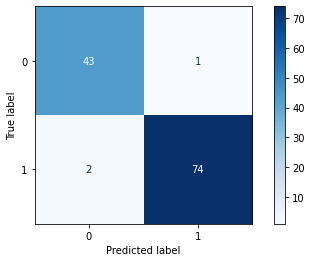

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, y_predA, cmap='Blues')
plt.show()

The values for Precision, Recall, F1-score and Specificity are calculated and printed.

In [ ]:
conf_mat2 = metrics.confusion_matrix(y_test, y_predA)
print(metrics.classification_report(y_test, y_predA))

TN = conf_mat2[0,0] 
TP = conf_mat2[1,1] 
FN = conf_mat2[1,0] 
FP = conf_mat2[0,1]
print('TN: ', TN,'  TP: ', TP,'  FN: ', FN,'  FP: ', FP)
sensitivity = TP/(TP+FN)
specificity = TN/(TN+FP)

print('sensitivity:', sensitivity)
print('specificity:', specificity)

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        44
           1       0.99      0.97      0.98        76

    accuracy                           0.97       120
   macro avg       0.97      0.98      0.97       120
weighted avg       0.98      0.97      0.98       120

TN:  43   TP:  74   FN:  2   FP:  1
sensitivity: 0.9736842105263158
specificity: 0.9772727272727273


The ROC curve is calculated and plotted along with the AUC value.

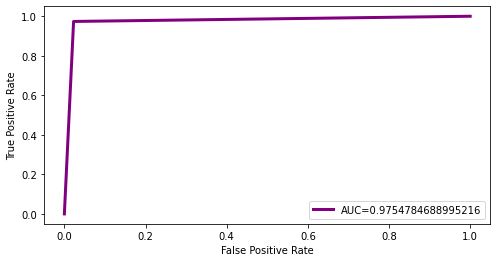

roc_auc_score for Logistic Regression:  0.9754784688995216


In [ ]:
fpr2, tpr2, _ = metrics.roc_curve(y_test, y_predA)
auc2 = roc_auc_score(y_test, y_predA)

plt.plot(fpr2, tpr2, color='purple', linewidth=3, label="AUC="+str(auc2))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.rcParams['figure.figsize'] = [8, 4]
plt.legend()
plt.show()

print('roc_auc_score for Logistic Regression: ', auc2)

Both the actual output and the predicted output data are plotted, in order to observe the quality of the model obtained.

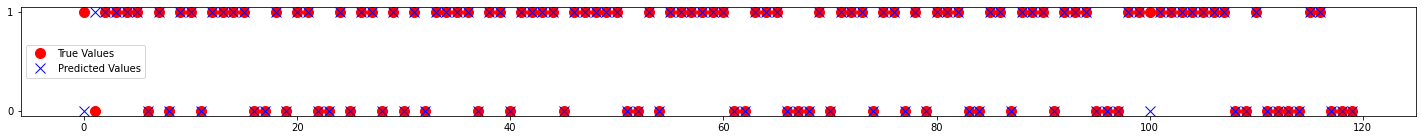

In [ ]:
plt.rcParams['figure.figsize'] = [25, 2]
plt.plot(range(len(y_test)), y_test, 'ro', markersize=10, label='True Values')
plt.plot(range(len(y_predA)), y_predA, 'bx', markersize=10, label='Predicted Values')
plt.yticks([0,1])
plt.legend(loc='center left')

According to the previous graph, only three data were incorrectly classified, since two of them were classified as 0 when in fact they should have taken the value of 1 (two false negatives), and the other was classified as 1 when in fact it should have taken the value of 0 (one false positive). This could also be verified with the confusion matrix.

####**CONCLUSIONS**

1. Taking into account the evaluation metrics implemented in these three models, it can be said that the model that presents the best performance is the model made with Scikit Learn, since it presents a total Accuracy of 0.98 (very close to 1), only 2 misclassified values ​​according to the confusion matrix, sensitivity and specificity of 0.974 and 1, respectively, and an AUC of 0.987 (very close to 1).
2. After the model made with Scikit Learn, the model with the best final result is the model made with the ADAM optimizer. This presents a total Accuracy of 0.975, only 3 misclassified values ​​according to the confusion matrix, sensitivity and specificity of 0.974 and 0.977, respectively, and an AUC of 0.975.
3. The second model carried out (Custom Logistic Regression) with descending gradient, is the one that presents the worst result of the three. However, the results with this model are also very good, since all the values ​​for the evaluated metrics are also close to 1, with a total Accuracy of 0.967, only 4 values ​​misclassified according to the confusion matrix, sensitivity and specificity of 0.961 and 0.977, respectively, and an AUC of 0.969.
4. As can be seen in the previous three points, the models were made and trained correctly, and the results with the three models were satisfactory, since all the values ​​corresponding to the implemented evaluation metrics were very close to 1.
5. The evaluation metrics implemented in this second point are appropriate for evaluating classification or logistic regression models.

####**REFERENCES**

1. https://developer.ibm.com/articles/implementing-logistic-regression-from-scratch-in-python/
2. https://towardsdatascience.com/how-to-implement-an-adam-optimizer-from-scratch-76e7b217f1cc
3. https://www.ibm.com/topics/logistic-regression
4. https://developers.google.com/machine-learning/crash-course/classification/accuracy?hl=en
5. https://towardsdatascience.com/understanding-confusion-matrix-a9ad42dcfd62
6. https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_fscore_support.html
7. https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
8. https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html
9. https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html
10. https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc
11. https://www.datacamp.com/tutorial/understanding-logistic-regression-python